In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("age_gender.csv")

In [3]:
data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [4]:
data.shape

(23705, 5)

In [6]:
data.dtypes

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [21]:
def values_to_array(pixels):
    arr=np.array(pixels,'float64')
    arr=arr.reshape(48,48)
    #print(arr.shape)
    return arr


In [23]:
data['pixels'] = data['pixels'].apply(values_to_array)

In [24]:
train_img,test_img,train_age,test_age=train_test_split(data['pixels'],data['age'],test_size=0.2,random_state=42)

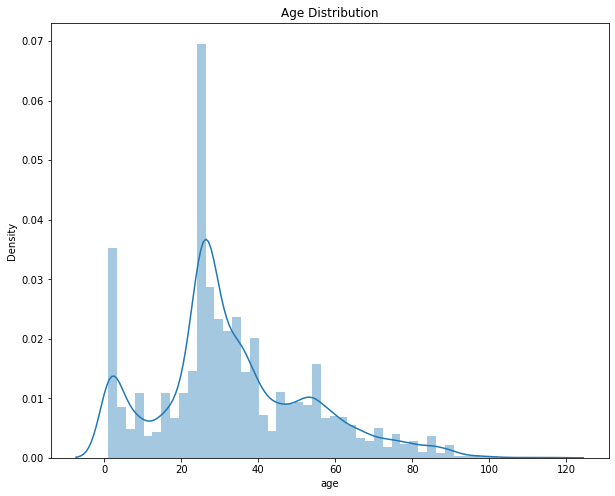

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(train_age)
plt.title('Age Distribution')
plt.show()

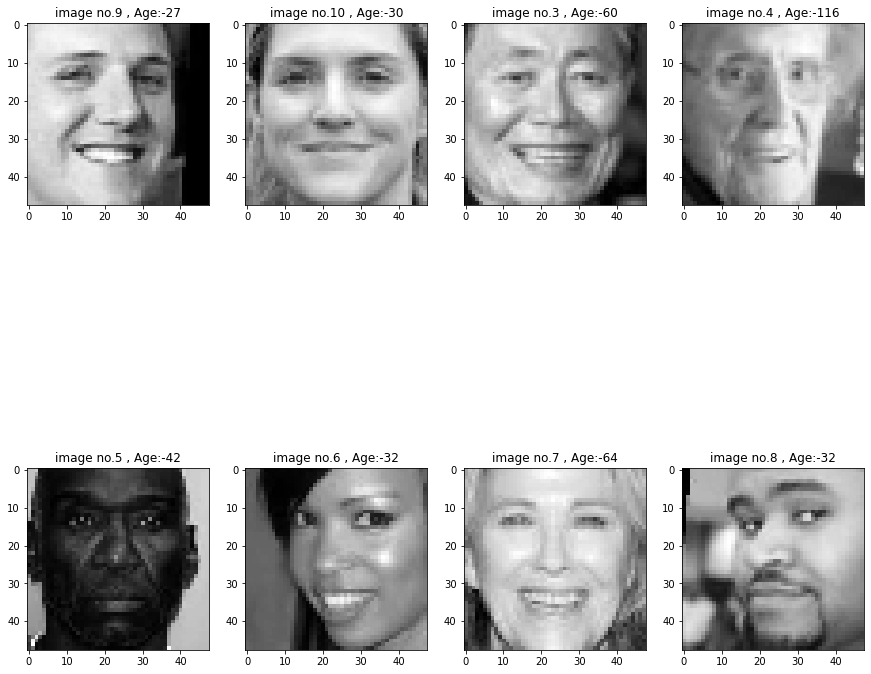

In [26]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(2,4,(i%8)+1)
    num=np.random.randint(1000)
    plt.title("image no.{0} , Age:-{1}".format(i+1,train_age.iloc[num]))
    plt.imshow(train_img.iloc[num],cmap='gray')
plt.show()

In [27]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),48,48,1))
    return data

In [28]:
train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

In [29]:
def schedule(epoch,lr):
    if epoch>=5:
        return 0.0001
    return 0.001
early_stop=EarlyStopping(monitor='val_mean_absolute_error',patience=2)
learning_rate_scheduler=LearningRateScheduler(schedule)
reduceLR=ReduceLROnPlateau(monitor='val_mean_absolute_error',patience=1,min_lr=0.00001)

In [30]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [32]:
model.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.mean_absolute_error])
r=model.fit(train_img,train_age,validation_data=(test_img,test_age),epochs=15,callbacks=[reduceLR])

Epoch 1/15
593/593 [==============================] - 137s 228ms/step - loss: 174.6163 - mean_absolute_error: 9.5565 - val_loss: 1283.0605 - val_mean_absolute_error: 33.2039
Epoch 2/15
593/593 [==============================] - 139s 234ms/step - loss: 97.9339 - mean_absolute_error: 7.2427 - val_loss: 115.6298 - val_mean_absolute_error: 8.1807
Epoch 3/15
593/593 [==============================] - 139s 234ms/step - loss: 81.1189 - mean_absolute_error: 6.6275 - val_loss: 225.3666 - val_mean_absolute_error: 10.4527
Epoch 4/15
593/593 [==============================] - 136s 230ms/step - loss: 57.7513 - mean_absolute_error: 5.6078 - val_loss: 76.7663 - val_mean_absolute_error: 6.3929
Epoch 5/15
593/593 [==============================] - 135s 227ms/step - loss: 52.4670 - mean_absolute_error: 5.3671 - val_loss: 79.1328 - val_mean_absolute_error: 6.5920
Epoch 6/15
593/593 [==============================] - 135s 227ms/step - loss: 48.0691 - mean_absolute_error: 5.1509 - val_loss: 74.4808 - val_m

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          1

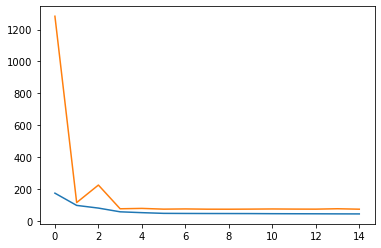

In [34]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

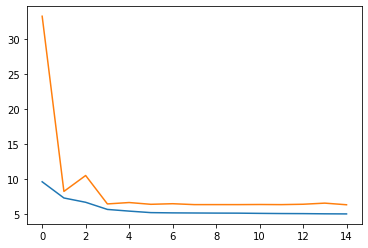

In [35]:
plt.plot(r.history['mean_absolute_error'])
plt.plot(r.history['val_mean_absolute_error'])

In [36]:
pred_train_Age=model.predict(train_img)
train_age=np.array(train_age,'int32')
pred_train_Age=np.reshape(pred_train_Age,(len(train_age),))
train_age=np.reshape(train_age,(len(train_age),))
train_images=np.reshape(train_img,(len(train_img),48,48))

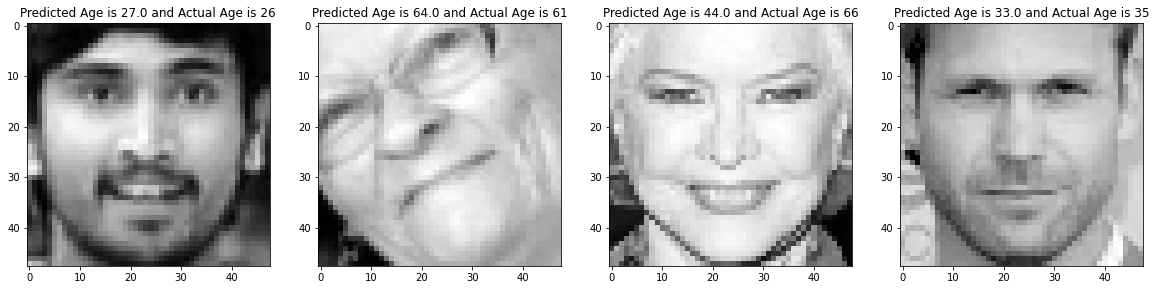

In [37]:
plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(1,4,(i%4)+1)
    plt.title("Predicted Age is {0} and Actual Age is {1}".format(np.round(pred_train_Age[i]),train_age[i]))
    plt.imshow(train_images[i],cmap='gray')
plt.show()


In [38]:
pred_test_Age=model.predict(test_img)
test_age=np.array(test_age,'int32')
pred_test_Age=np.reshape(pred_test_Age,(len(test_age),))
test_age=np.reshape(test_age,(len(test_age),))
test_images=np.reshape(test_img,(len(test_img),48,48))

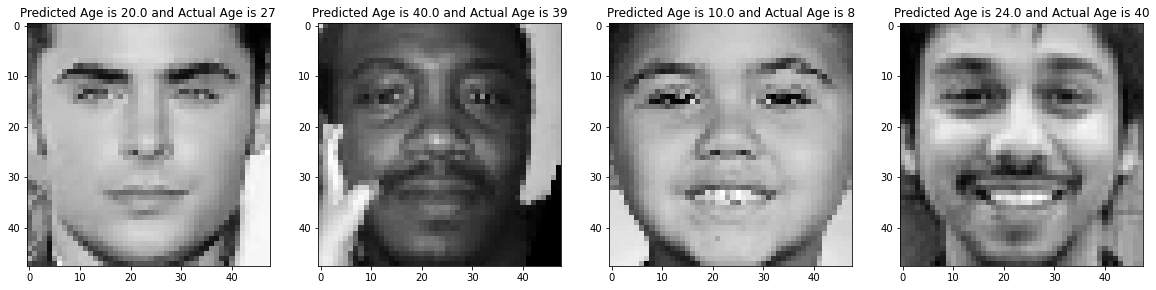

In [39]:
plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(1,4,(i%4)+1)
    plt.title("Predicted Age is {0} and Actual Age is {1}".format(np.round(pred_test_Age[i]),test_age[i]))
    plt.imshow(test_images[i],cmap='gray')
plt.show()